# Analysis of TCGA DNA Methylation Data

## Data Processing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
!pwd

/Users/tanishagupta/GRIPS


In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder

In [3]:
raw_clin_kipan = pd.read_csv('KIPAN.clin.merged.txt', sep='\t', header=None ).T

raw_clin_kipan.columns = raw_clin_kipan.iloc[0]
raw_clin_kipan = raw_clin_kipan[1:]
#raw_clin_kipan

In [4]:
#raw_clin_kipan.columns
#raw_clin_kipan.columns.str


#raw_clin_kipan.columns.str.contains('admin')
#raw_clin_kipan.loc[:,raw_clin_kipan.columns.to_numpy()[raw_clin_kipan.columns.str.contains('barcode')]]
#raw_clin_kipan.columns.to_numpy()[raw_clin_kipan.columns.str.contains('barcode')
selected_columns = raw_clin_kipan.columns.to_numpy()[raw_clin_kipan.columns.str.contains('barcode')]
#selected_columns = [ i for i in selected_columns if 'drug_barcode' not in i]
selected_columns = [ i for i in selected_columns if '-' not in i]
#selected_columns

In [5]:
raw_clin_kipan_barcode = raw_clin_kipan.loc[:,selected_columns]
#raw_clin_kipan_barcode

In [6]:
raw_clin_kipan_barcode.columns = [s.split('.')[-1] for s in selected_columns]
#raw_clin_kipan_barcode

In [7]:
raw_clin_kipan_barcode.drop(['bcr_drug_barcode','bcr_radiation_barcode',
                             'biospecimen_barcode_bottom','bcr_followup_barcode',
                             'shipment_portion_bcr_aliquot_barcode','bcr_omf_barcode'], 
                            axis=1, errors='ignore')

,bcr_patient_barcode,bcr_sample_barcode,bcr_aliquot_barcode,bcr_analyte_barcode,bcr_portion_barcode,bcr_slide_barcode
1,tcga-kl-8328,tcga-kl-8328-01a,tcga-kl-8328-01a-11d-2308-01,tcga-kl-8328-01a-11d,tcga-kl-8328-01a-11,tcga-kl-8328-01a-01-bs1
2,tcga-kl-8339,tcga-kl-8339-01a,tcga-kl-8339-01a-11d-2308-01,tcga-kl-8339-01a-11d,tcga-kl-8339-01a-11,tcga-kl-8339-01a-01-bs1
3,tcga-km-8439,tcga-km-8439-01a,tcga-km-8439-01a-11d-2308-01,tcga-km-8439-01a-11d,tcga-km-8439-01a-11,tcga-km-8439-01a-01-ts1
4,tcga-km-8441,tcga-km-8441-01a,tcga-km-8441-01a-11d-2308-01,tcga-km-8441-01a-11d,tcga-km-8441-01a-11,tcga-km-8441-01a-01-ts1
5,tcga-km-8442,tcga-km-8442-01a,tcga-km-8442-01a-11d-2308-01,tcga-km-8442-01a-11d,tcga-km-8442-01a-11,tcga-km-8442-01a-01-ts1
...,...,...,...,...,...,...
937,tcga-y8-a896,tcga-y8-a896-01a,tcga-y8-a896-01a-11d-a35y-01,tcga-y8-a896-01a-11d,tcga-y8-a896-01a-11,tcga-y8-a896-01a-01-ts1
938,tcga-y8-a897,tcga-y8-a897-01a,tcga-y8-a897-01a-11d-a35y-01,tcga-y8-a897-01a-11d,tcga-y8-a897-01a-11,tcga-y8-a897-01a-01-ts1
939,tcga-y8-a8ry,tcga-y8-a8ry-01a,tcga-y8-a8ry-01a-11d-a36w-01,tcga-y8-a8ry-01a-11d,tcga-y8-a8ry-01a-11,tcga-y8-a8ry-01a-01-ts1
940,tcga-y8-a8s0,tcga-y8-a8s0-01a,tcga-y8-a8s0-01a-11d-a36w-01,tcga-y8-a8s0-01a-11d,tcga-y8-a8s0-01a-11,tcga-y8-a8s0-01a-01-ts1


In [8]:
# vital_status: The survival state of the person registered on the protocol.
# days_to_death: Number of days between the date used for index and the date from a person's date of death represented as a calculated number of days.

tcga_id_kipan='patient.samples.sample.portions.portion.analytes.analyte.aliquots.aliquot.bcr_aliquot_barcode'

clin_kipan = raw_clin_kipan.loc[:,[tcga_id_kipan, 'admin.disease_code',
'patient.days_to_death','patient.vital_status', 
'patient.age_at_initial_pathologic_diagnosis', 'patient.gender', 'patient.follow_ups.follow_up.person_neoplasm_cancer_status', 
                                  'patient.stage_event.pathologic_stage']]
                                #, 'patient.karnofsky_performance_score']]

#clin_kipan

In [9]:
clin_kipan = clin_kipan.set_index(tcga_id_kipan)
clin_kipan.index = clin_kipan.index.str.upper()
clin_kipan.sort_index(inplace=True)

In [10]:
#clin_kipan.columns

In [11]:
clin_kipan = clin_kipan[clin_kipan.index.notnull()]

clin_kipan.index = ['-'.join( s.split('-')[:4] ) for s in clin_kipan.index.tolist() ]
#clin_kipan.index

In [12]:
clin_kipan.rename(columns = {'patient.days_to_death':'days_to_death', 'patient.vital_status':'vital_status', 'patient.age_at_initial_pathologic_diagnosis':'age_at_initial_pathologic_diagnosis', 'patient.gender':'gender', 'admin.disease_code':'subtype', 'patient.follow_ups.follow_up.person_neoplasm_cancer_status':'metastasis_info', 'patient.stage_event.pathologic_stage':'stage'}, inplace = True)

In [13]:
vals = clin_kipan['days_to_death'].astype(np.float32)

clin_kipan['survival'] = 'non-lts'
clin_kipan.loc[pd.to_numeric(clin_kipan.days_to_death).ge(2*365) | clin_kipan.days_to_death.isna(), 'survival'] = 'lts'
#clin_kipan

In [14]:
meth_kipan = pd.read_csv('KIPAN.hm450.tsv', delim_whitespace=True, header=[0] ).set_index('Composite_Element_REF').drop(['Gene_Symbol','Chromosome','Genomic_Coordinate'], axis=1 ).T

In [15]:
meth_kipan.sort_index().head()

Composite_Element_REF,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,cg09560636,cg09560650,cg09560658,cg09560723,cg09560763,cg09560811,cg09560911,cg09560912,cg09560953,cg09560979
TCGA-2K-A9WE-01A-11D-A383-05,0.461441,NaN,NaN,0.143910,0.847165,0.737362,0.716795,0.351877,0.248987,0.012136,...,NaN,NaN,0.929777,NaN,0.821841,0.927202,0.018890,NaN,0.844136,NaN
TCGA-2Z-A9J1-01A-11D-A383-05,0.595894,NaN,NaN,0.080724,0.867306,0.706806,0.217862,0.169408,0.173115,0.010890,...,NaN,NaN,0.684141,NaN,0.287309,0.932596,0.018205,NaN,0.253988,NaN
TCGA-2Z-A9J2-01A-11D-A383-05,0.481305,NaN,NaN,0.437447,0.898927,0.758109,0.868605,0.577745,0.567242,0.012268,...,NaN,NaN,0.934065,NaN,0.393975,0.949127,0.027293,NaN,0.898587,NaN
TCGA-2Z-A9J3-01A-12D-A383-05,0.553850,NaN,NaN,0.064233,0.917291,0.675538,0.543087,0.850444,0.470811,0.012568,...,NaN,NaN,0.939414,NaN,0.198644,0.944607,0.019058,NaN,0.648340,NaN
TCGA-2Z-A9J5-01A-21D-A383-05,0.184349,NaN,NaN,0.126119,0.928018,0.677846,0.850474,0.444735,0.204529,0.012233,...,NaN,NaN,0.926087,NaN,0.589858,0.931093,0.029658,NaN,0.722906,NaN


In [16]:
len( set(meth_kipan.index) )

867

In [17]:
len ( set( [ '-'.join( i.split('-')[:4] ) for i in meth_kipan.index ] ) )

867

In [18]:
meth_kipan.index = [ '-'.join( i.split('-')[:4] ) for i in meth_kipan.index ]
meth_kipan.sort_index(inplace=True)
#meth_kipan

In [19]:
len( set( clin_kipan.index ) & set( meth_kipan.index ) )

660

In [20]:
len( set( clin_kipan.index ) - set( meth_kipan.index ) )

281

In [21]:
len( set( meth_kipan.index ) - set( clin_kipan.index ) )

207

In [22]:
#set( meth_kipan.index ) - set( clin_kipan.index )

In [23]:
from collections import Counter

Counter( [i.split('-')[3] for i in meth_kipan.index] )

Counter({'01A': 656, '11A': 205, '01B': 4, '05A': 2})

In [24]:
Counter( [i.split('-')[3] for i in np.array( set( clin_kipan.index ) & set( meth_kipan.index ) ).tolist()])

Counter({'01A': 656, '01B': 4})

In [25]:
meth_kipan.drop( ['TCGA-DV-A4W0-05A','TCGA-UZ-A9PS-05A'], axis=0, inplace=True, errors = 'ignore')
#meth_kipan

In [26]:
clin_normal = pd.DataFrame( index = meth_kipan.index[meth_kipan.index.str.contains('11A')], columns = clin_kipan.columns )
#clin_normal

In [27]:
clin_normal['subtype'] = 'Normal'
#clin_normal

In [28]:
clin_kipan['kipan'] = 'RCC'
#clin_kipan

In [29]:
clin_normal['kipan'] = 'Normal'
clin_normal['survival'] = 'Normal'
#clin_normal

In [30]:
clin_all = pd.concat( [clin_normal, clin_kipan], axis=0 )
clin_all.sort_index( inplace = True )

In [32]:
clin_all = clin_all[['kipan','subtype', 'days_to_death', 'vital_status','survival',
       'age_at_initial_pathologic_diagnosis', 'gender', 'metastasis_info', 'stage']]
#clin_all

In [33]:
clin_all.columns

Index(['kipan', 'subtype', 'days_to_death', 'vital_status', 'survival',
       'age_at_initial_pathologic_diagnosis', 'gender', 'metastasis_info',
       'stage'],
      dtype='object', name=0)

In [34]:
df_clin_meth = pd.concat([clin_all, meth_kipan], axis='columns', join='inner').sort_values(['kipan'], axis=0)
#df_clin_meth

In [35]:
Counter( df_clin_meth['subtype'] )

Counter({'Normal': 205, 'kirp': 275, 'kirc': 319, 'kich': 66})

In [36]:
df_clin_meth = df_clin_meth.T

In [38]:
#df_clin_meth.head(10)

## KS Test and FDR Correction for comparison between Normal and Tumor

In [39]:
count = 0
for i in df_clin_meth.iloc[0,:].tolist():
    if i == "Normal":
        count+=1

In [40]:
count

205

In [41]:
len(df_clin_meth.iloc[0,:].tolist())

865

In [42]:
import scipy.stats as sc

In [43]:
sc.ks_2samp(df_clin_meth.iloc[9, 0:206], df_clin_meth.iloc[9, 206:])

KstestResult(statistic=0.3596652768979183, pvalue=6.661338147750939e-16)

In [44]:
len(df_clin_meth)

183210

In [45]:
ks_2_values = []
for i in range (9, len(df_clin_meth)):
    ks_2_values.append(sc.ks_2samp(df_clin_meth.iloc[i, 0:206], df_clin_meth.iloc[i, 206:]))

In [46]:
#ks_2_values[0:100]

In [47]:
#df_clin_meth.index.tolist()

In [48]:
#df_clin_meth.index.tolist()[7:]

### Create df_stat

In [49]:
df_stat = pd.DataFrame()

In [50]:
df_stat['ID'] = df_clin_meth.index.tolist()[9:]

In [51]:
new_ks_2_values = []
for i in ks_2_values:
    new_ks_2_values.append(i[1])

In [52]:
df_stat["P Value"] = new_ks_2_values

In [53]:
#df_stat.head(10)

In [54]:
#df_stat = df_stat.sort_values(['P Value'], axis=0)

In [55]:
#df_stat.head(10)

In [56]:
import statsmodels.stats.multitest
corrected_vals = statsmodels.stats.multitest.fdrcorrection(new_ks_2_values)
corrected_vals = corrected_vals[1]

In [57]:
#corrected_vals

In [58]:
df_stat["Corrected P Value"] = corrected_vals

In [59]:
#df_stat.head(10)

In [60]:
#df_stat = df_stat.sort_values(['Corrected P Value'], axis=0)

In [61]:
#df_stat

In [62]:
#df_stat["ID"]

In [63]:
#df_stat["ID"].tolist()[0:10]

In [64]:
top_ten = [df_stat["ID"].tolist()[0:10]]
#top_ten

In [65]:
#df_clin_meth.loc["cg00000029"].tolist()[:205]

In [66]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn-deep')


In [67]:
from statistics import mean

means_normal = []
for i in range (9, len(df_clin_meth)):
    means_normal.append(mean(df_clin_meth.iloc[i, 0:206].tolist()))
#means_normal[0:100]

In [68]:
tumor_means = []
for i in range (9, len(df_clin_meth)):
    tumor_means.append(mean(df_clin_meth.iloc[i, 206:].tolist()))
#means_normal[0:100

In [69]:
df_stat["Normal Means"] = means_normal

In [70]:
df_stat["Tumor Means"] = tumor_means

In [71]:
df_stat.head()

,ID,P Value,Corrected P Value,Normal Means,Tumor Means
0,cg00000029,6.661338e-16,1.797958e-15,0.435997,0.502345
1,cg00000108,1.000000e+00,1.000000e+00,NaN,NaN
2,cg00000109,1.000000e+00,1.000000e+00,NaN,NaN
3,cg00000165,5.140888e-12,1.147241e-11,0.132543,0.205535
4,cg00000236,5.195960e-03,7.320207e-03,0.895769,0.897032


In [72]:
difference_means = []
for i in range (0, len(df_stat)):
    difference_means.append(tumor_means[i] - means_normal[i])
#difference_means[0:100]

In [73]:
df_stat["Difference of Means"] = difference_means

In [74]:
df_stat = df_stat.sort_values(['Difference of Means'], axis=0, ascending=False)
#df_stat.tail(40000)

In [75]:
df_temp = df_stat.tail(40500)


In [76]:
df_temp_2 = df_temp.head(250)
#df_temp_2.tail(50)

In [77]:
df_stat.set_index("ID", inplace=True)

In [78]:
#raw_clin_kipan.head(10)

## These are the Top Positive Ones (T-N > 0; hypermethylation):

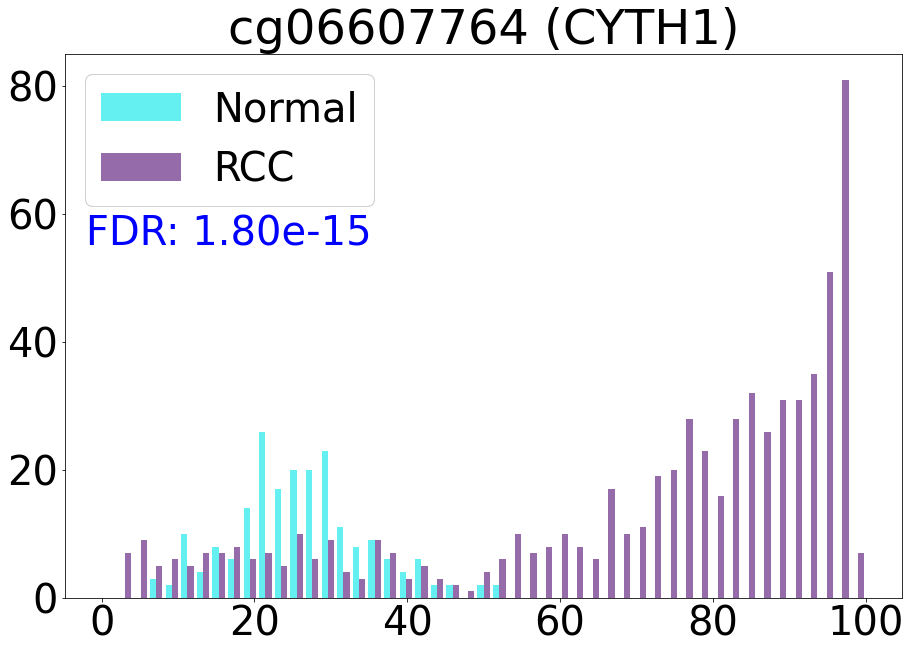

In [79]:
import matplotlib.patches as mpatches
x = df_clin_meth.loc['cg06607764'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg06607764'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 40})
bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg06607764 (CYTH1)')
first_legend = plt.legend(loc='upper left')
ax = plt.gca().add_artist(first_legend)

plt.text(-2, 60, "FDR: 1.80e-15", fontsize=40, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [80]:
#y

In [81]:
df_stat.loc["cg06607764", "Corrected P Value"]

1.797957731132405e-15

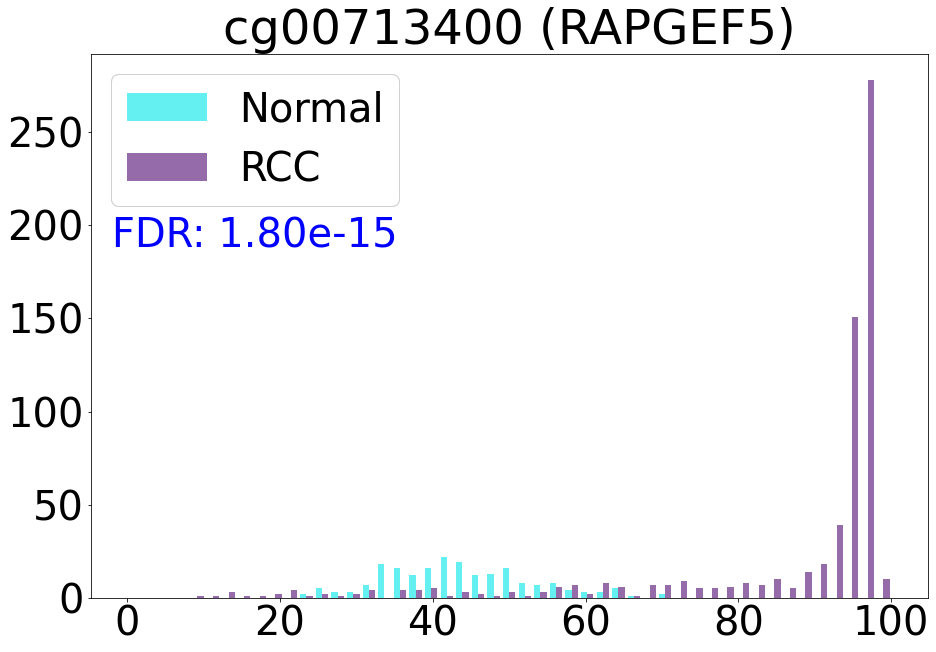

In [82]:
x = df_clin_meth.loc['cg00713400'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg00713400'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg00713400 (RAPGEF5)')
first_legend = plt.legend(loc='upper left')
ax = plt.gca().add_artist(first_legend)

plt.text(-2, 205, "FDR: 1.80e-15", fontsize=40, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [83]:
df_stat.loc["cg00713400", "Corrected P Value"]

1.797957731132405e-15

In [84]:
#print(df_clin_meth.loc["cg00713400", :].tolist())

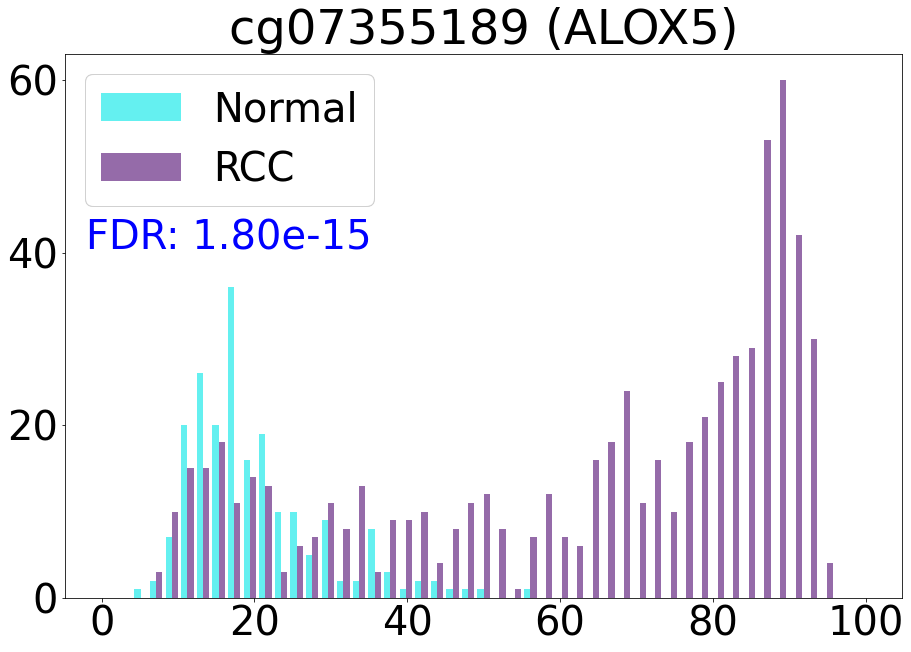

In [85]:
x = df_clin_meth.loc['cg07355189'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg07355189'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg07355189 (ALOX5)')
first_legend = plt.legend(loc='upper left')
ax = plt.gca().add_artist(first_legend)

plt.text(-2, 44, "FDR: 1.80e-15", fontsize=40, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [86]:
df_stat.loc["cg07355189", "Corrected P Value"]

1.797957731132405e-15

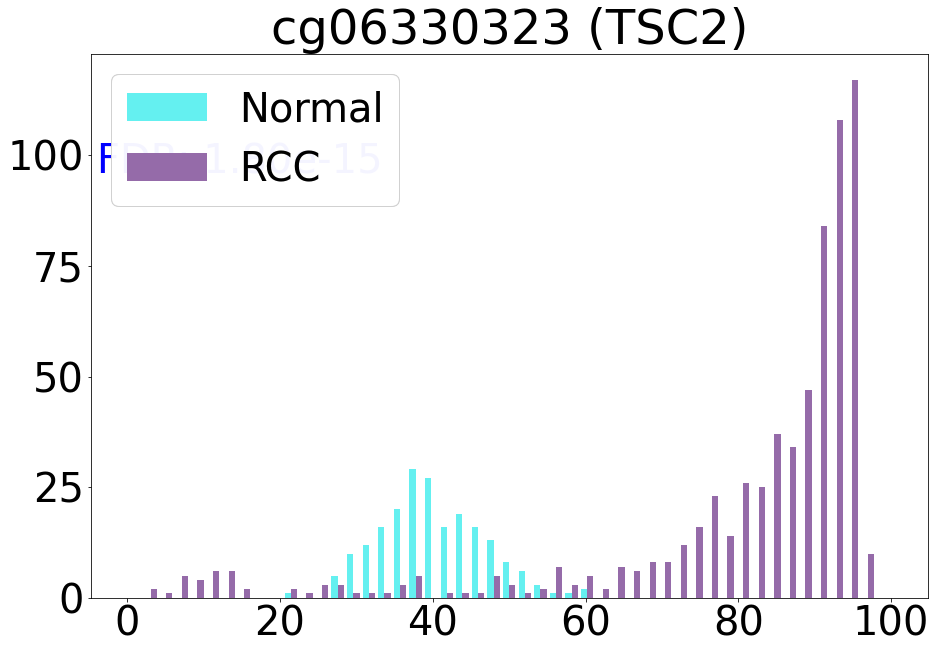

In [87]:
x = df_clin_meth.loc['cg06330323'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg06330323'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg06330323 (TSC2)')
first_legend = plt.legend(loc='upper left')
ax = plt.gca().add_artist(first_legend)

plt.text(-4, 103, "FDR: 1.80e-15", fontsize=40, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [88]:
df_stat.loc["cg06330323", "Corrected P Value"]

1.797957731132405e-15

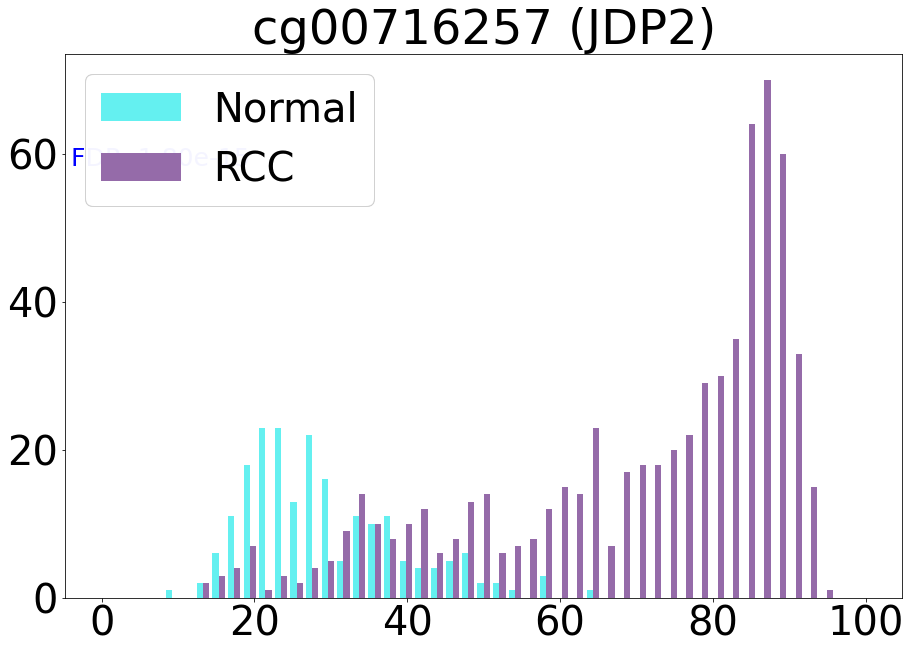

In [89]:
x = df_clin_meth.loc['cg00716257'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg00716257'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg00716257 (JDP2)')
first_legend = plt.legend(loc='upper left')
ax = plt.gca().add_artist(first_legend)

plt.text(-4, 61, "FDR: 1.80e-15", fontsize=25, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [90]:
df_stat.loc["cg00716257", "Corrected P Value"]

1.797957731132405e-15

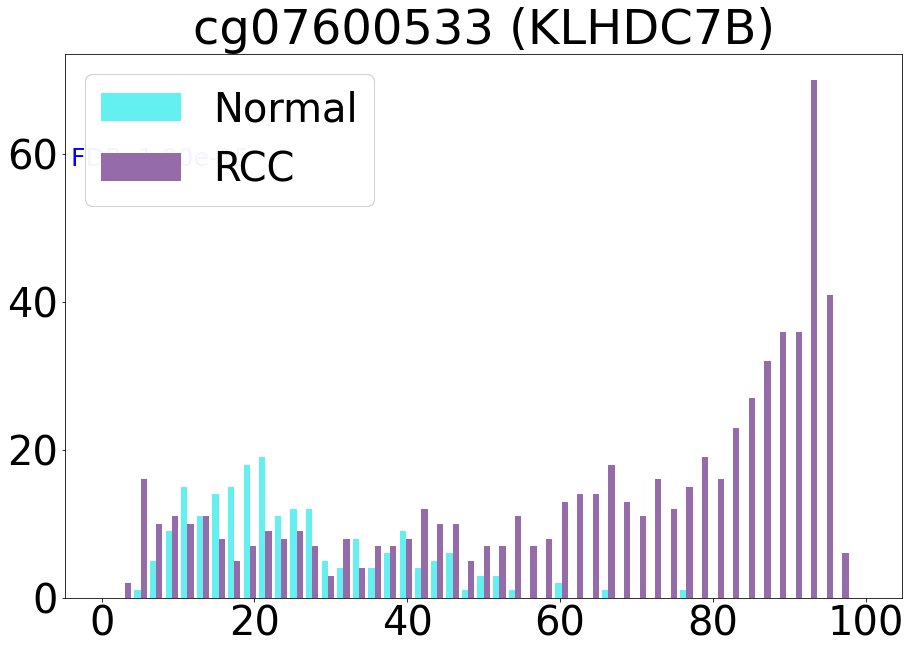

In [91]:
x = df_clin_meth.loc['cg07600533'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg07600533'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg07600533 (KLHDC7B)')
first_legend = plt.legend(loc='upper left')
ax = plt.gca().add_artist(first_legend)

plt.text(-4, 61, "FDR: 1.80e-15", fontsize=25, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [92]:
df_stat.loc["cg07600533", "Corrected P Value"]

1.797957731132405e-15

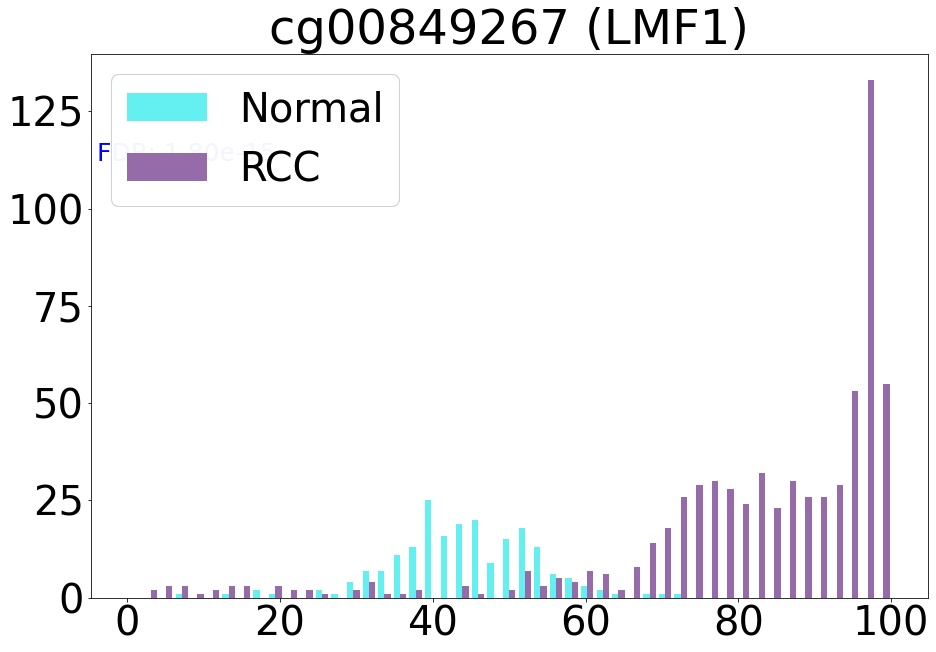

In [93]:
x = df_clin_meth.loc['cg00849267'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg00849267'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg00849267 (LMF1)')
first_legend = plt.legend(loc='upper left')
ax = plt.gca().add_artist(first_legend)

plt.text(-4, 117, "FDR: 1.80e-15", fontsize=25, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [94]:
df_stat.loc["cg00849267", "Corrected P Value"]

1.797957731132405e-15

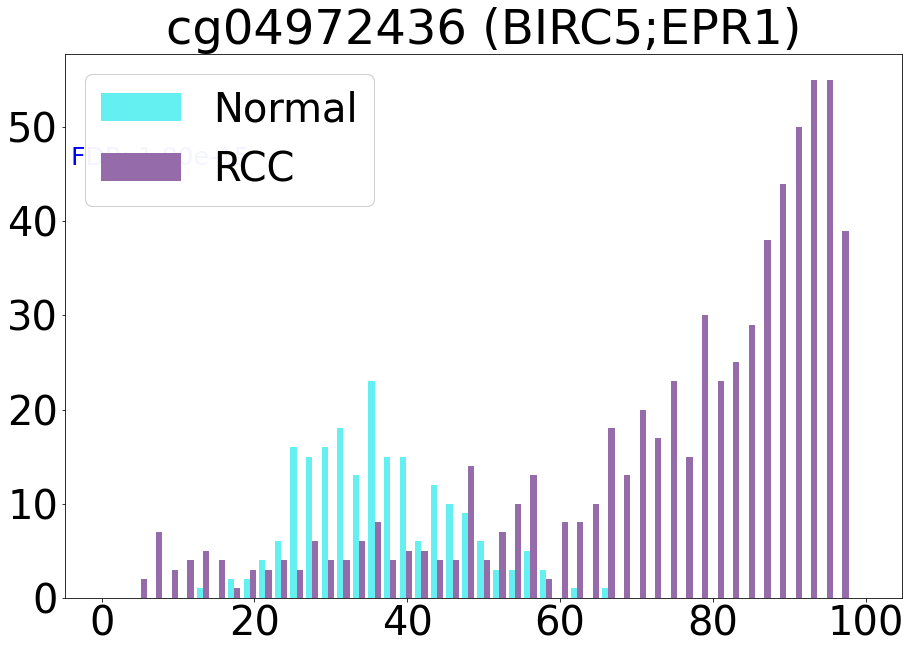

In [95]:
x = df_clin_meth.loc['cg04972436'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg04972436'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg04972436 (BIRC5;EPR1)')
first_legend = plt.legend(loc='upper left')
ax = plt.gca().add_artist(first_legend)

plt.text(-4, 48, "FDR: 1.80e-15", fontsize=25, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [96]:
df_stat.loc["cg04972436", "Corrected P Value"]

1.797957731132405e-15

## Top Negative Ones (T-N < 0; hypomethylation):

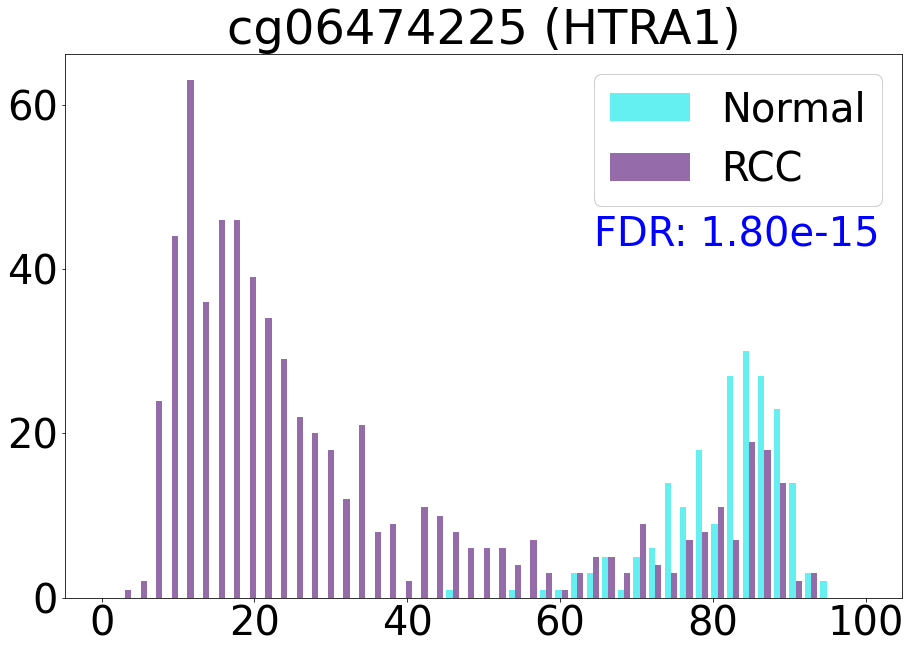

In [97]:
x = df_clin_meth.loc['cg06474225'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg06474225'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg06474225 (HTRA1)')
first_legend = plt.legend(loc='upper right')
ax = plt.gca().add_artist(first_legend)

plt.text(64.5, 46.5, "FDR: 1.80e-15", fontsize=40, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()


In [98]:
df_stat.loc["cg06474225", "Corrected P Value"]

1.797957731132405e-15

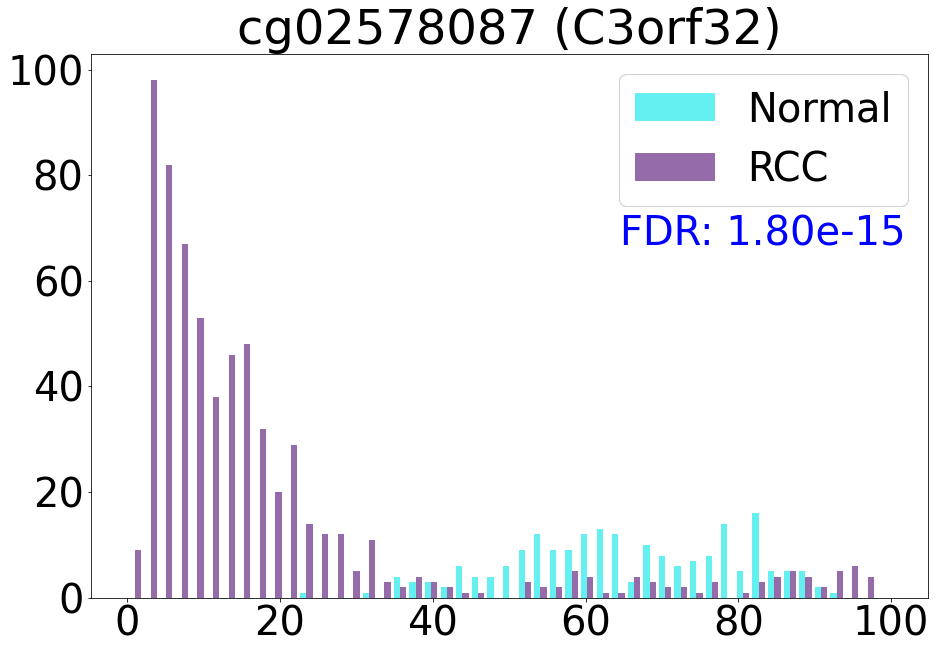

In [99]:
x = df_clin_meth.loc['cg02578087'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg02578087'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg02578087 (C3orf32)')
first_legend = plt.legend(loc='upper right')
ax = plt.gca().add_artist(first_legend)

plt.text(64.5, 72.5, "FDR: 1.80e-15", fontsize=40, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [100]:
df_stat.loc["cg02578087", "Corrected P Value"]

1.797957731132405e-15

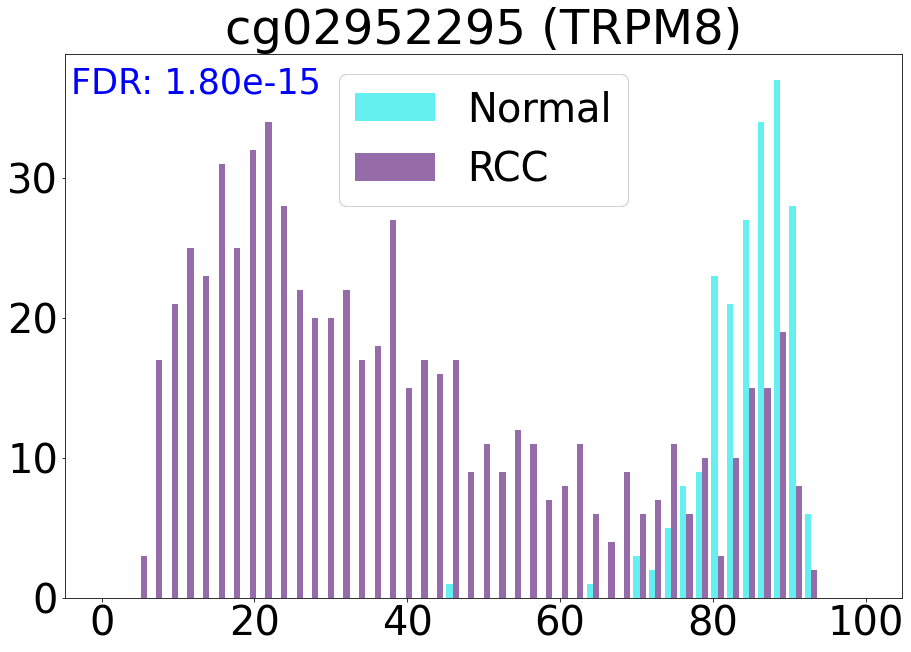

In [101]:
x = df_clin_meth.loc['cg02952295'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg02952295'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg02952295 (TRPM8)')
first_legend = plt.legend()
ax = plt.gca().add_artist(first_legend)

plt.text(-4, 38, "FDR: 1.80e-15", fontsize=35, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [102]:
df_stat.loc["cg02952295", "Corrected P Value"]

1.797957731132405e-15

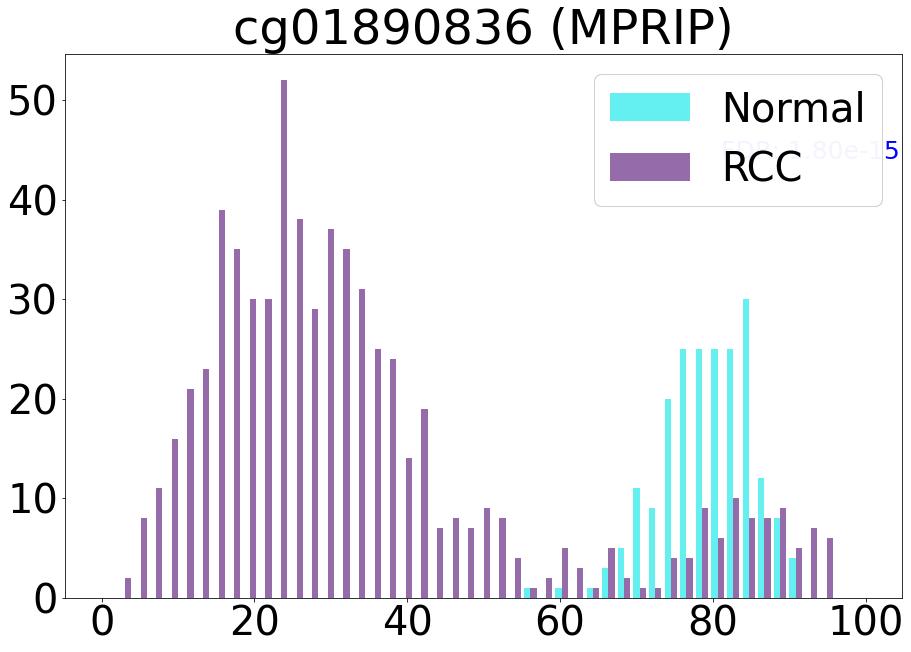

In [103]:
x = df_clin_meth.loc['cg01890836'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg01890836'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg01890836 (MPRIP)')
first_legend = plt.legend(loc='upper right')
ax = plt.gca().add_artist(first_legend)

plt.text(81, 46, "FDR: 1.80e-15", fontsize=25, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [104]:
df_stat.loc["cg01890836", "Corrected P Value"]

1.797957731132405e-15

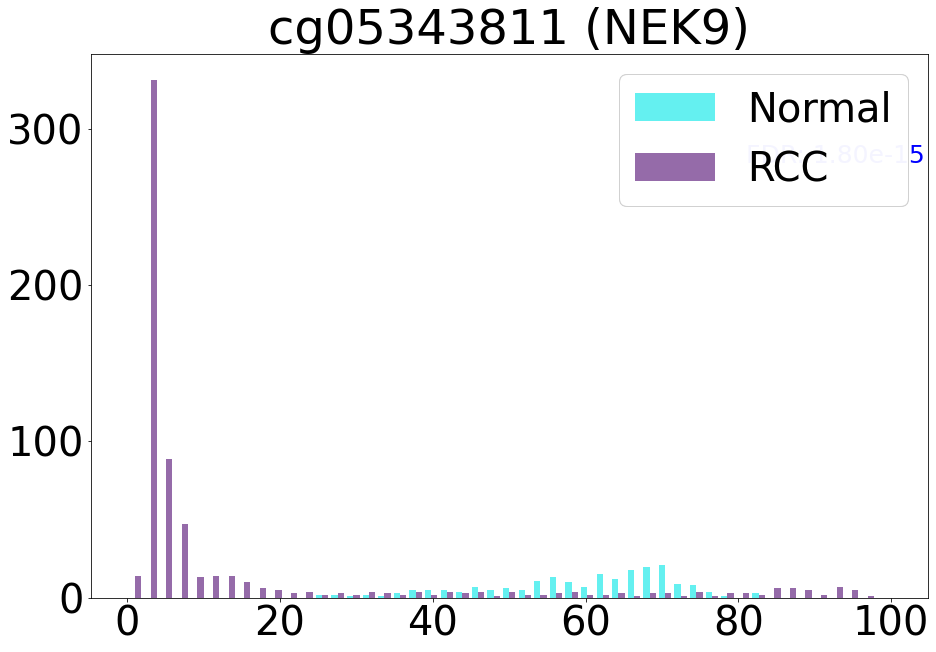

In [105]:
x = df_clin_meth.loc['cg05343811'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg05343811'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg05343811 (NEK9)')
first_legend = plt.legend(loc='upper right')
ax = plt.gca().add_artist(first_legend)

plt.text(81, 290, "FDR: 1.80e-15", fontsize=25, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [106]:
df_stat.loc["cg05343811", "Corrected P Value"]

1.797957731132405e-15

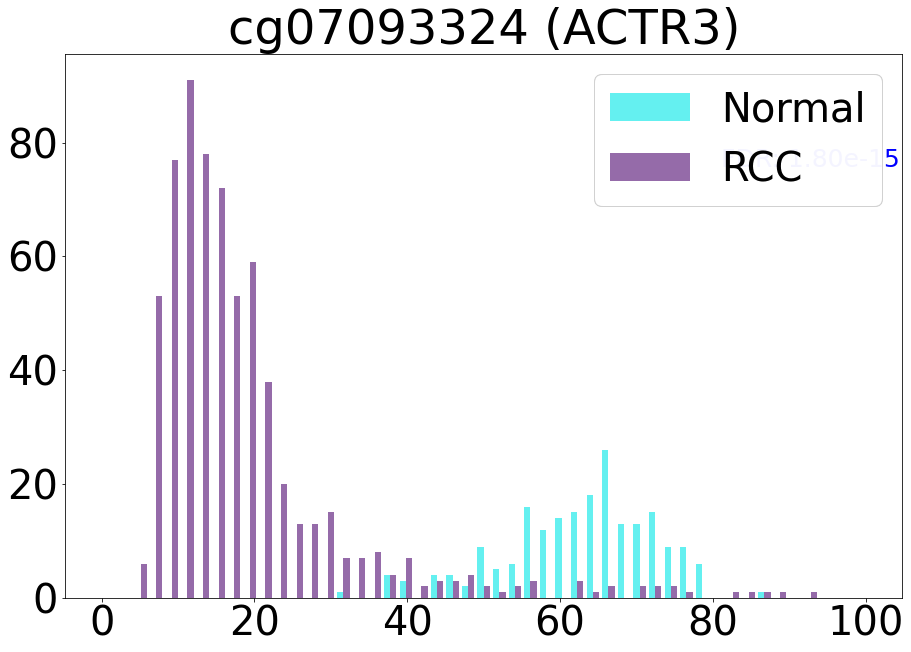

In [107]:

x = df_clin_meth.loc['cg07093324'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg07093324'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg07093324 (ACTR3)')
first_legend = plt.legend(loc='upper right')
ax = plt.gca().add_artist(first_legend)

plt.text(81, 79, "FDR: 1.80e-15", fontsize=25, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [108]:
df_stat.loc["cg05343811", "Corrected P Value"]

1.797957731132405e-15

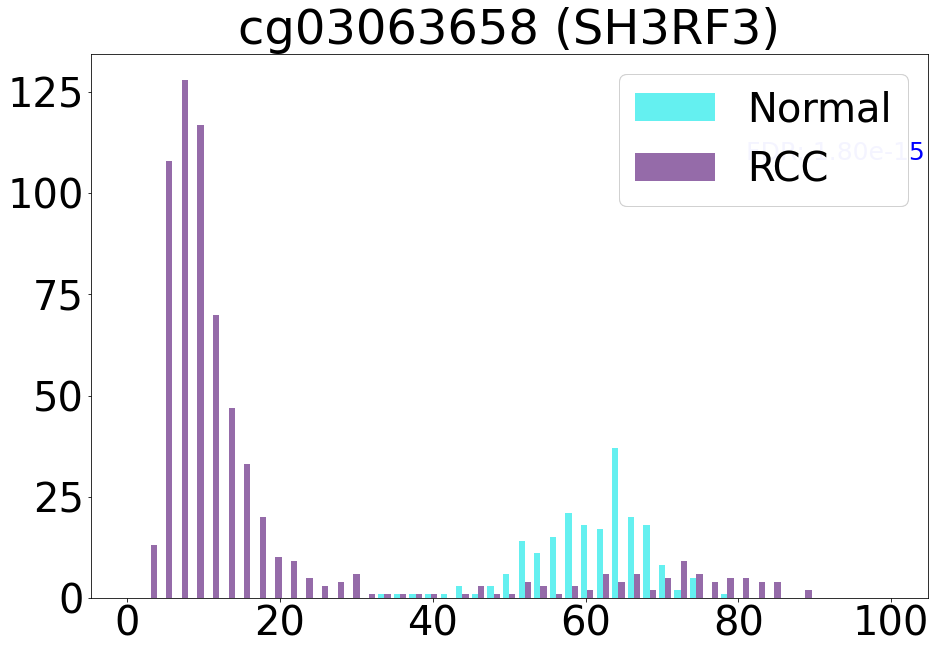

In [109]:

x = df_clin_meth.loc['cg03063658'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg03063658'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg03063658 (SH3RF3)')
first_legend = plt.legend(loc='upper right')
ax = plt.gca().add_artist(first_legend)

plt.text(81, 113, "FDR: 1.80e-15", fontsize=25, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [110]:
df_stat.loc["cg03063658", "Corrected P Value"]

1.797957731132405e-15

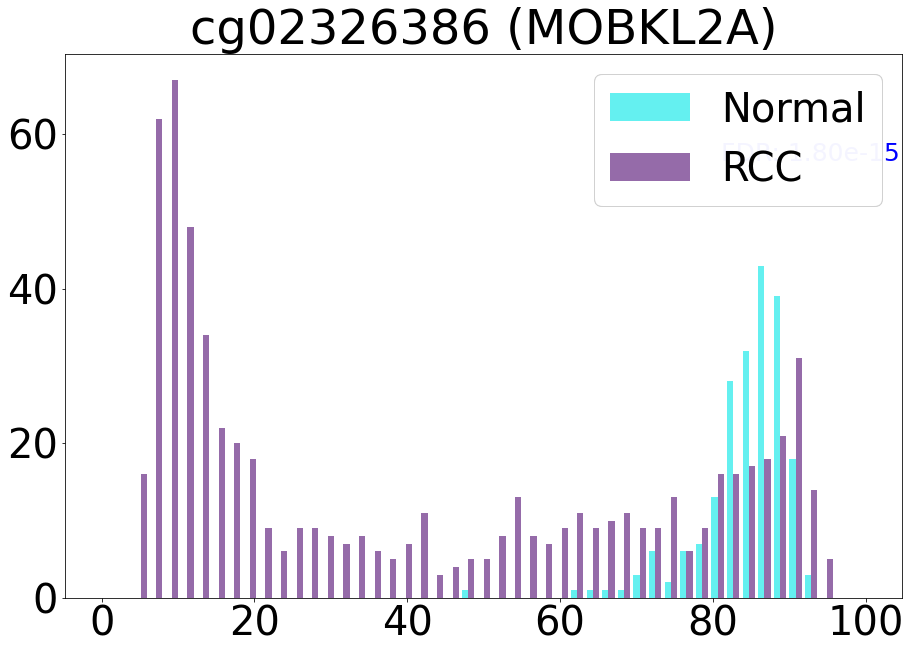

In [111]:
x = df_clin_meth.loc['cg02326386'].tolist()[:205]
x = [i*100 for i in x]
#print(x)
y = df_clin_meth.loc['cg02326386'].tolist()[206:]
y = [i*100 for i in y]
#print(y)

bins = np.linspace(0, 100, 50)

plt.hist([x, y], bins, label=['Normal', 'RCC'], color=["#64F0F0", "#956BA9"])
plt.title('cg02326386 (MOBKL2A)')
first_legend = plt.legend(loc='upper right')
ax = plt.gca().add_artist(first_legend)

plt.text(81, 59, "FDR: 1.80e-15", fontsize=25, verticalalignment='top', color="blue")

#plt.savefig("TSC2.pdf")
plt.show()

In [112]:
df_stat.loc["cg02326386", "Corrected P Value"]

1.797957731132405e-15

## Stat Anlysis for Subtypes KICH, KIRC, KIRP:

## Boxplot Stuff

In [188]:
df_boxplot = pd.DataFrame()

In [189]:
df_boxplot["TCGA"] = df_sorted.columns.tolist()

In [190]:
df_clin_meth.head(10)

,TCGA-CJ-4905-11A,TCGA-BP-5178-11A,TCGA-B0-4712-11A,TCGA-CZ-5466-11A,TCGA-B0-4713-11A,TCGA-BP-5177-11A,TCGA-B0-4714-11A,TCGA-CZ-4866-11A,TCGA-B0-4718-11A,TCGA-BP-5176-11A,...,TCGA-B4-5838-01A,TCGA-B4-5843-01A,TCGA-B4-5844-01A,TCGA-B8-4146-01B,TCGA-B8-4153-01B,TCGA-B8-4621-01A,TCGA-B8-4622-01A,TCGA-B8-5158-01A,TCGA-B4-5836-01A,TCGA-Y8-A8S1-01A
kipan,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,...,RCC,RCC,RCC,RCC,RCC,RCC,RCC,RCC,RCC,RCC
subtype,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,...,kirc,kirc,kirc,kirc,kirc,kirc,kirc,kirc,kirc,kirp
days_to_death,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vital_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,alive,alive,alive,alive,alive,alive,alive,alive,alive,alive
survival,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,...,lts,lts,lts,lts,lts,lts,lts,lts,lts,lts
age_at_initial_pathologic_diagnosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52,45,61,41,74,63,57,56,61,61
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,male,male,female,female,male,male,male,male,female,male
metastasis_info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,tumor free,with tumor,tumor free,tumor free,tumor free,NaN,tumor free
stage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,stage iv,stage i,stage ii,stage i,stage iii,stage i,stage iv,stage iii,stage i,stage i
cg00000029,0.347601,0.248976,0.270373,0.621374,0.403761,0.468852,0.263599,0.316744,0.379443,0.509899,...,0.508256,0.487548,0.649682,0.824019,0.461,0.381803,0.670973,0.467914,0.693535,0.581694


In [191]:
#df_sorted

In [192]:
df_clin_meth_temp = df_sorted.drop(["kipan", "subtype", "days_to_death", "vital_status", "survival", "age_at_initial_pathologic_diagnosis", "gender"], axis=0)

In [193]:
df_clin_meth_temp.head()

,TCGA-CJ-4905-11A,TCGA-A3-3367-11A,TCGA-BQ-5892-11A,TCGA-A3-3370-11A,TCGA-A3-3373-11A,TCGA-BQ-5891-11A,TCGA-A3-3376-11A,TCGA-B0-5121-11A,TCGA-A3-3385-11A,TCGA-BQ-5890-11A,...,TCGA-J7-8537-01A,TCGA-J7-6720-01A,TCGA-IZ-A6M9-01A,TCGA-IZ-A6M8-01A,TCGA-IZ-8196-01A,TCGA-IZ-8195-01A,TCGA-IA-A83W-01A,TCGA-IA-A83V-01A,TCGA-BQ-5877-01A,TCGA-Y8-A8S1-01A
metastasis_info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,with tumor,tumor free,tumor free,tumor free,tumor free,tumor free,NaN,NaN,with tumor,tumor free
stage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,stage iii,stage i,stage i,stage i,stage i,stage ii,stage i,stage i,stage iv,stage i
cg00000029,0.347601,0.378468,0.518723,0.402117,0.441971,0.362334,0.387277,0.404371,0.482538,0.50779,...,0.494306,0.309913,0.434439,0.252716,0.549741,0.865842,0.21544,0.420706,0.807433,0.581694
cg00000108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
from statistics import mean

means_samples = []
for i in range (0, len(df_clin_meth_temp.iloc[1, :])):
    means_samples.append(np.nanmean(df_clin_meth_temp.iloc[0:, i].tolist()))
#means_normal[0:100]

TypeError: cannot perform reduce with flexible type

In [ ]:
#means_samples

In [ ]:
df_boxplot["Mean Samples"] = means_samples

In [ ]:
df_boxplot["subtype"] = df_sorted.loc["subtype",:].tolist()

In [ ]:
df_boxplot

In [ ]:
import plotly.express as px
df = df_boxplot
fig = px.box(df, x="subtype", y='Mean Samples', color="subtype", color_discrete_sequence=["#64F0F0", "#7E2E1F","#FFA026","#FF0000"], points="all", title="Mean Methlyation of Samples Per Subtype", width=880, height=700)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='Grey')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(plot_bgcolor="white")
fig.update_yaxes(range=[0.3, 0.6])
fig.update_layout(font_size=24)
# fig.update_layout(
#     title={
#         'text': "Plot Title",
#         'y':0.9,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'})
fig.show()

In [ ]:
means_kich = []
for i in range (7, len(df_sorted)):
    means_kich.append(mean(df_sorted.iloc[i, 205:271].tolist()))

In [ ]:
means_kirc = []
for i in range (7, len(df_sorted)):
    means_kirc.append(mean(df_sorted.iloc[i, 271:590].tolist()))

In [ ]:
z = df_sorted.loc['cg01288184'].tolist()[590:]

In [ ]:
x = df_clin_meth.loc['cg07093324'].tolist()[:205]

In [ ]:
mean_kich = np.nanmean(df_boxplot.iloc[205:271, 1].tolist())
mean_kich

In [ ]:
std_kich = np.nanstd(df_boxplot.iloc[205:271, 1].tolist())
std_kich

In [ ]:
var_kich = np.nanvar(df_boxplot.iloc[205:271, 1].tolist())
var_kich

In [ ]:
mean_kirc = np.nanmean(df_boxplot.iloc[271:590, 1].tolist())
mean_kirc

In [ ]:
std_kirc = np.nanstd(df_boxplot.iloc[271:590, 1].tolist())
std_kirc

In [ ]:
var_kirc = np.nanvar(df_boxplot.iloc[271:590, 1].tolist())
var_kirc

In [ ]:
mean_kirp = np.nanmean(df_boxplot.iloc[590:, 1].tolist())
mean_kirp

In [ ]:
std_kirp = np.nanstd(df_boxplot.iloc[590:, 1].tolist())
std_kirp

In [ ]:
var_kirp = np.nanvar(df_boxplot.iloc[590:, 1].tolist())
var_kirp

In [ ]:
mean_normal = np.nanmean(df_boxplot.iloc[:205, 1].tolist())
mean_normal

In [ ]:
std_normal = np.nanstd(df_boxplot.iloc[:205, 1].tolist())
std_normal

In [ ]:
var_normal = np.nanvar(df_boxplot.iloc[:205, 1].tolist())
var_normal

## Other Data Table Stuff

In [ ]:
subtype_list = df_clin_meth.loc["subtype"].tolist()[205:]
survival_list = df_clin_meth.loc["survival"].tolist()[205:]

In [ ]:
gender_list = df_clin_meth.loc["gender"].tolist()[205:]

In [ ]:
#survival_list

In [ ]:
df_clin_meth.head(10)

In [ ]:
len(subtype_list)

In [ ]:
len(survival_list)

In [ ]:
kirp = 0
kich = 0
kirc = 0
kirp_s = 0
kirc_s = 0
kich_s = 0
kirp_ns = 0
kirc_ns = 0
kich_ns = 0

kirp_f = 0
kich_f = 0
kirc_f = 0
kirp_m = 0
kich_m = 0
kirc_m = 0
for i in range(0, len(subtype_list)):
    if subtype_list[i] == "kirp":
        kirp = kirp + 1
        if(survival_list[i] == "lts"):
            kirp_s  = kirp_s + 1
        elif(survival_list[i] == "non-lts"):
            kirp_ns = kirp_ns + 1
        if(gender_list[i] == "male"):
            kirp_m  = kirp_m + 1
        elif(gender_list[i] == "female"):
            kirp_f  = kirp_f + 1
    elif subtype_list[i] == "kirc":
        kirc = kirc + 1
        if(survival_list[i] == "lts"):
            kirc_s  = kirc_s + 1
        elif(survival_list[i] == "non-lts"):
            kirc_ns = kirc_ns + 1 
        if(gender_list[i] == "male"):
            kirc_m  = kirc_m + 1
        elif(gender_list[i] == "female"):
            kirc_f  = kirc_f + 1
    else:
        kich = kich + 1
        if(survival_list[i] == "lts"):
            kich_s  = kich_s + 1
        elif(survival_list[i] == "non-lts"):
            kich_ns = kich_ns + 1
        if(gender_list[i] == "male"):
            kich_m  = kich_m + 1
        elif(gender_list[i] == "female"):
            kich_f  = kich_f + 1

In [ ]:
incidence_kirp = kirp/len(subtype_list)
incidence_kirp

In [ ]:
incidence_kirc = kirc/len(subtype_list)
incidence_kirc

In [ ]:
incidence_kich = kich/len(subtype_list)
incidence_kich

In [ ]:
survival_kirp = kirp_s/len(subtype_list)
survival_kirp

In [ ]:
survival_kirc = kirc_s/len(subtype_list)
survival_kirc

In [ ]:
survival_kich = kich_s/len(subtype_list)
survival_kich

In [ ]:
kirp_f

In [ ]:
kich_f

In [ ]:
kirc_f

In [ ]:
kirp_m

In [ ]:
kich_m

In [ ]:
kirc_m

In [ ]:
kirp_s

In [ ]:
kirp_ns

In [ ]:
kirc_s

In [ ]:
kirc_ns

In [ ]:
kich_s

In [ ]:
kich_ns

## Code for Metastasis vs Subtype:

In [ ]:
kirp = 0
kich = 0
kirc = 0
kirp_meta = 0
kirc_meta = 0
kich_meta = 0
kirp_nmeta = 0
kirc_nmeta = 0
kich_nmeta = 0

for i in range(0, len(subtype_list)):
    if subtype_list[i] == "kirp":
        kirp = kirp + 1
        if(metastasis_list[i] == "with tumor"):
            kirp_meta  = kirp_meta + 1
        elif(metastasis_list[i] == "tumor free"):
            kirp_nmeta = kirp_nmeta + 1
    elif subtype_list[i] == "kirc":
        kirc = kirc + 1
        if(metastasis_list[i] == "with tumor"):
            kirc_meta  = kirc_meta + 1
        elif(metastasis_list[i] == "tumor free"):
            kirc_nmeta = kirc_nmeta + 1 
    else:
        kich = kich + 1
        if(metastasis_list[i] == "with tumor"):
            kich_meta  = kich_meta + 1
        elif(metastasis_list[i] == "tumor free"):
            kich_nmeta = kich_nmeta + 1

In [ ]:
kirp_meta 

In [ ]:
kirc_meta

In [ ]:
kich_meta

In [ ]:
kirp_nmeta

In [ ]:
kirc_nmeta

In [ ]:
kich_nmeta

In [ ]:
df_clin_meth.iloc[7, 205:].isna().sum()

In [ ]:
len(df_clin_meth.iloc[1,:])

In [ ]:
865-205

In [ ]:
660-99

In [ ]:
metastasis_list = df_clin_meth.loc["metastasis_info"].tolist()[205:]

In [ ]:
raw_clin_kipan.loc[:, 'patient.follow_ups.follow_up.person_neoplasm_cancer_status']

In [ ]:
raw_clin_kipan['patient.new_tumor_events.new_tumor_event_after_initial_treatment'].isna().sum()

In [ ]:
raw_clin_kipan['patient.primary_therapy_outcome_success'].isna().sum()

In [ ]:
raw_clin_kipan['patient.follow_ups.follow_up.person_neoplasm_cancer_status'].isna().sum()

In [ ]:
raw_clin_kipan['patient.new_tumor_events.new_tumor_event_after_initial_treatment'].isna().sum()

In [ ]:
df_clin_meth.head(10)

In [ ]:
df_tumors = df_clin_meth.iloc[:, 205:]
df_tumors.head(10)

In [ ]:
df_tumors.sort_values("subtype", axis=1)

# Logistic Regression Normal or Tumor?